### Data cleaning checklist
   - [Distribution of price of property](#Distribution-of-price-of-property)

In [2]:
import numpy as np
import pandas as pd

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (18, 9)

In [4]:
data_file = pd.read_csv('kc_house_data.csv')

In [5]:
data_file.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data_file

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
remove_Na = data_file.fillna('0.0')

In [8]:
remove_Na.to_csv('fillna.csv')

### taking the count of null/Nan in each column

In [9]:
data_file.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data_file.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##  Find if there is any duplicated row

In [10]:
data_file.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
21597    False
21598    False
21599    False
21600    False
21601    False
21602    False
21603    False
21604    False
21605    False
21606    False
21607    False
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [12]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


# Distribution of price of property 

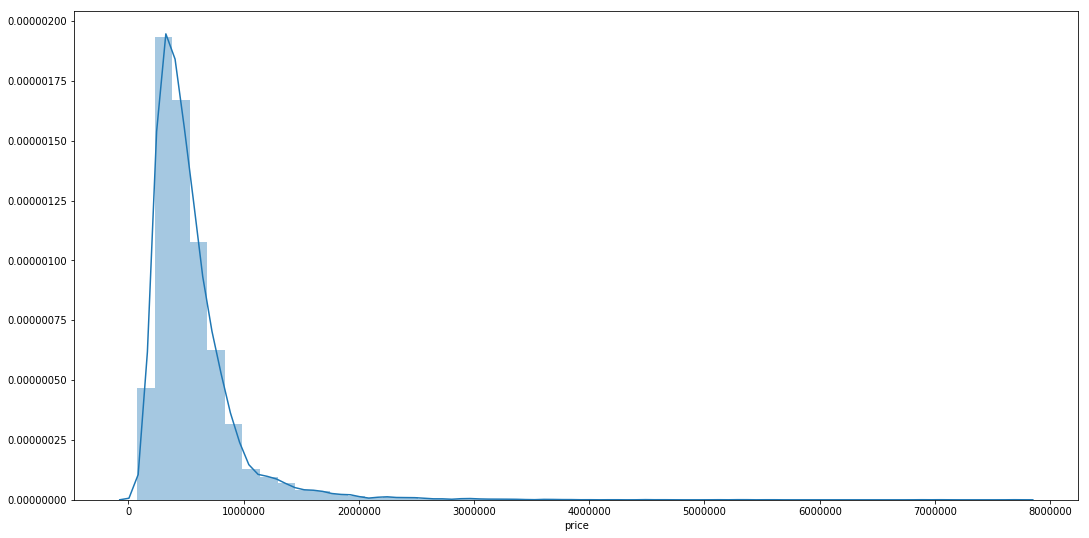

In [14]:
sns.distplot(data_file['price'],kde= True)

## Scatter plot of data on the basis of property built in a year and its price

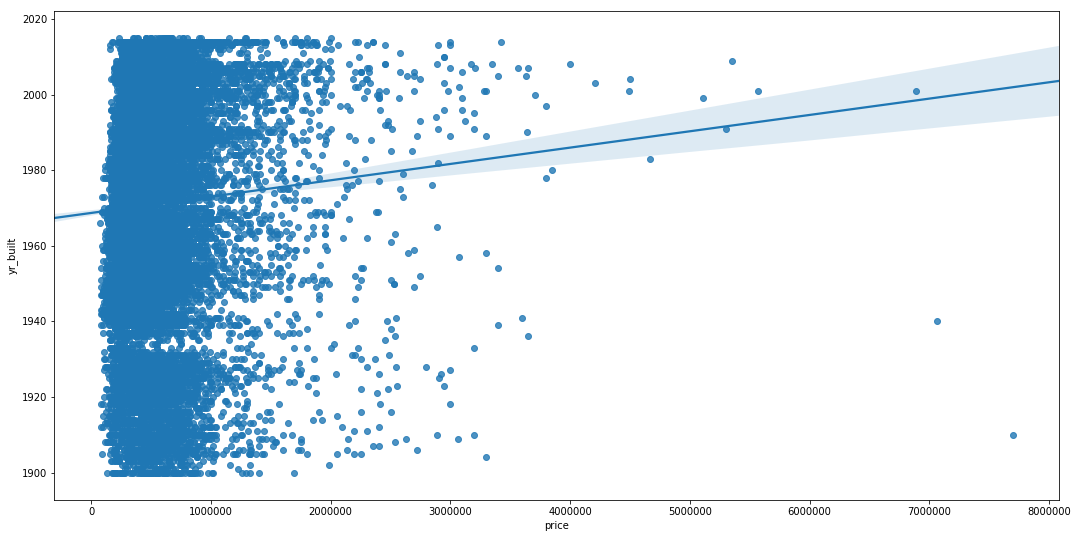

In [15]:
sns.regplot(x = 'price',y='yr_built',data = data_file,scatter = True)

In [16]:
room_groups = data_file.groupby(data_file['yr_built'])

In [17]:
room_groups.mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,,
1900,5.060402e+09,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,6.873563,1487.068966,244.942529,435.344828,98104.655172,47.594106,-122.288874,1667.114943,7222.195402
1901,5.036920e+09,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,7.034483,1513.620690,250.000000,68.517241,98121.000000,47.630710,-122.329793,1530.965517,3947.862069
1902,4.280460e+09,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889
1903,4.508135e+09,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,6.869565,1402.869565,104.869565,260.130435,98105.608696,47.591474,-122.287261,1537.608696,5303.760870
1904,4.542878e+09,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,6.911111,1307.177778,296.000000,266.400000,98117.933333,47.609891,-122.316822,1630.222222,4600.066667
1905,4.427030e+09,752977.986486,3.310811,1.864865,1965.810811,10311.081081,1.621622,0.013514,0.256757,3.770270,7.472973,1641.351351,324.459459,459.486486,98110.972973,47.602680,-122.312554,1811.486486,6341.148649
1906,3.719887e+09,669799.402174,3.228261,1.777174,1802.228261,5325.195652,1.494565,0.000000,0.130435,3.673913,7.184783,1537.554348,264.673913,174.369565,98110.750000,47.628545,-122.315707,1705.217391,4442.728261
1907,4.281123e+09,676257.246154,3.261538,1.784615,1904.276923,5161.307692,1.615385,0.000000,0.169231,3.661538,7.261538,1601.661538,302.615385,429.492308,98113.030769,47.607817,-122.320046,1766.153846,4925.184615
1908,4.809381e+09,564348.686047,3.081395,1.636628,1699.639535,6492.511628,1.436047,0.011628,0.406977,3.767442,6.953488,1398.965116,300.674419,324.255814,98112.313953,47.594113,-122.315558,1744.767442,6270.604651


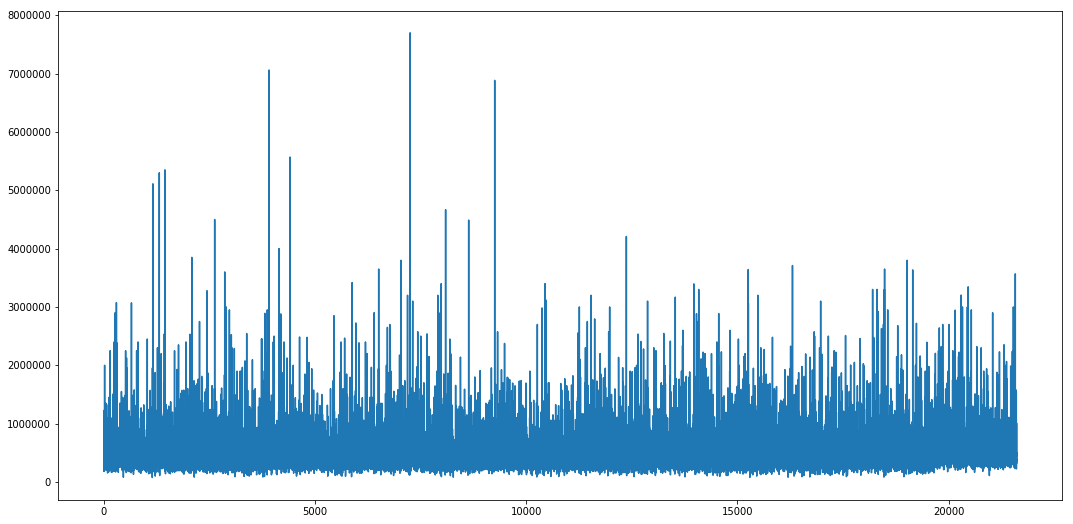

In [18]:
max_price = data_file['price']
max_price.plot()

In [19]:
max_price.max()

7700000.0

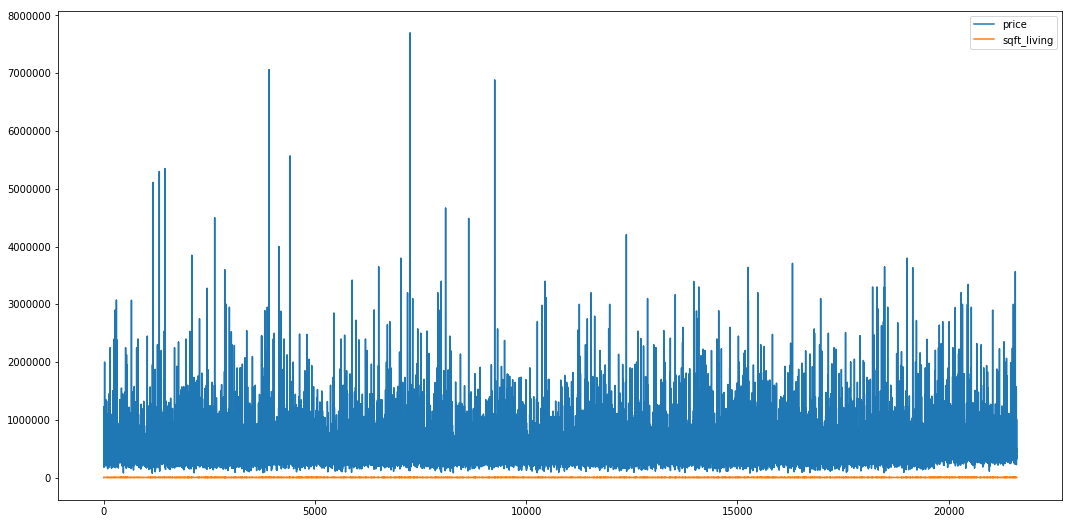

In [20]:
df = data_file[['sqft_living','price']]
df.plot()

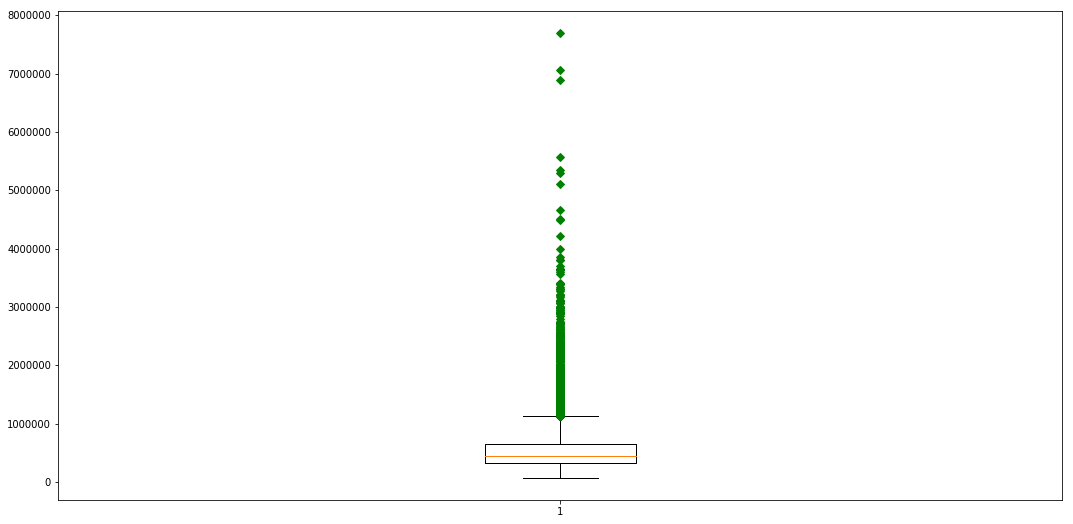

In [44]:
plt_box_v = plt.boxplot(data_file['price'], 0, 'gD')

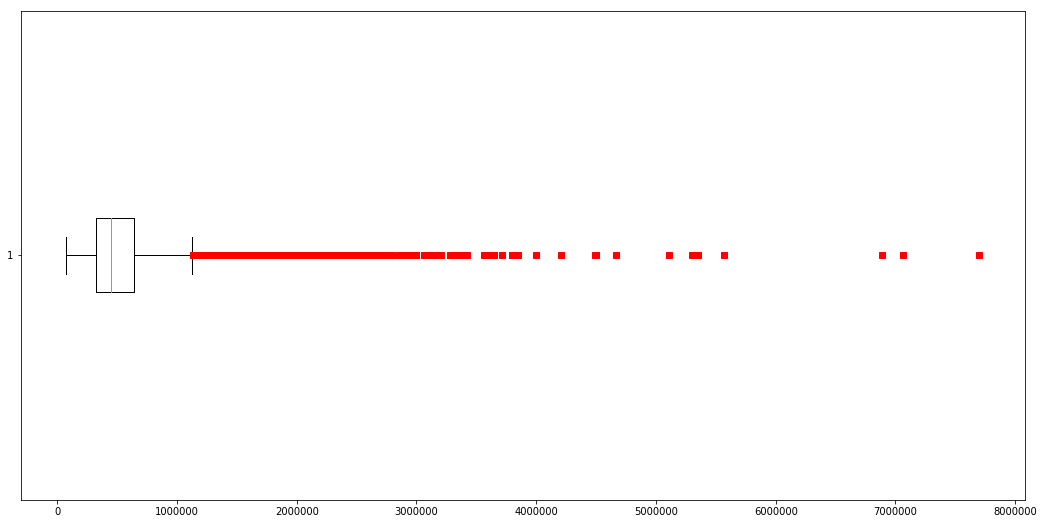

In [45]:
# horizontal boxes
plt.figure()
plt_box_h = plt.boxplot(data_file['price'], 0, 'rs', 0)

In [46]:
plt.setp(plt_box_v['whiskers'],color='black')

[None, None]

In [ ]:
date_field = data_file['date']

In [ ]:
data_file['date'] = data_file.date.apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y')[0])

In [ ]:
data_file['date']


In [ ]:
sns.pairplot(data_file)

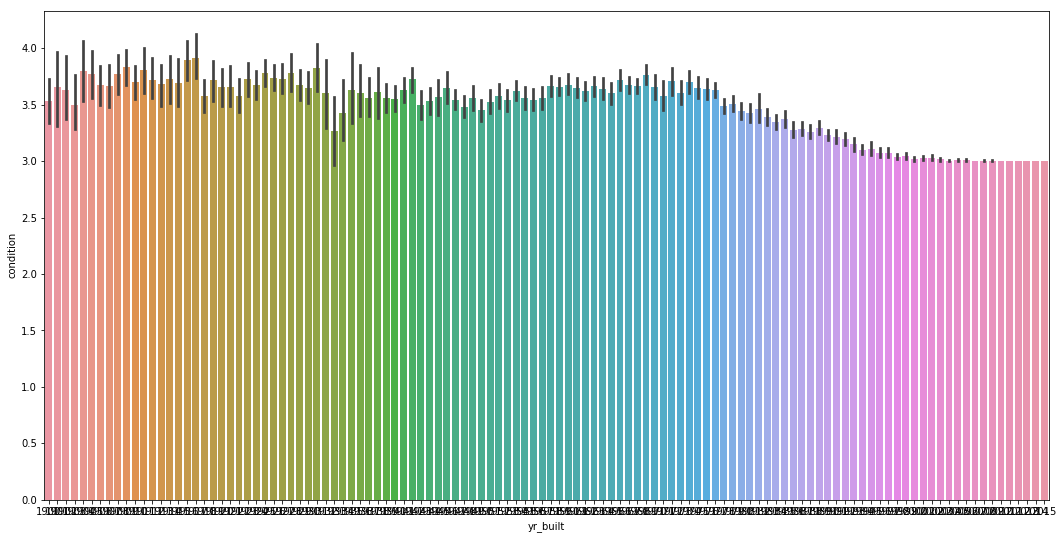

In [29]:
sns.barplot(x="yr_built",y="condition",data=data_file)

                 price  yr_renovated  yr_built  sqft_lot
price         1.000000      0.126434  0.054012  0.089661
yr_renovated  0.126434      1.000000 -0.224874  0.007644
yr_built      0.054012     -0.224874  1.000000  0.053080
sqft_lot      0.089661      0.007644  0.053080  1.000000


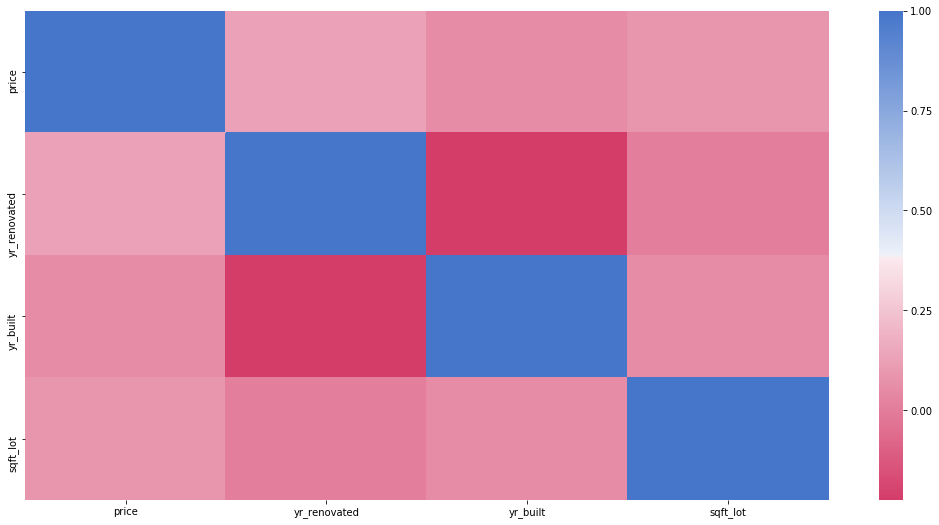

In [38]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data_file[['price', 'yr_renovated', 'yr_built', 'sqft_lot']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [39]:
data_file["date"] = pd.to_datetime(data_file["date"], format='%Y-%m-%d')

In [40]:
data_file["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21583   2014-06-10
21584   2014-12-02
21585   2014-08-28
21586   2014-10-15
21587   2015-03-05
21588   2014-11-13
21589   2014-09-10
21590   2014-05-14
21591   2014-10-02
21592   2015-04-16
21593   2015-03-17
21594   2014-10-17
21595   2014-10-31
21596   2014-08-13
21597   2015-04-21
21598   2014-10-13
21599   2014-09-15
21600   2014-10-15
21601   2015-04-07
21602   2014-06-26
21603   2014-08-25
21604   2015

In [5]:
 dt = np.dtype([('time', [('min', int), ('sec', int)]),
             ('temp', float)])
 x = np.zeros((1,), dtype=dt)

In [6]:
x

array([((0, 0),  0.)],
      dtype=[('time', [('min', '<i4'), ('sec', '<i4')]), ('temp', '<f8')])